In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [5]:
import os.path
import dolfyn.adv.api as avm
import dolfyn.adv.turbulence as turb

In [6]:
fname = '/Users/lillie/turbulence_data/raw_data/TTM_NREL03_May2015'

In [7]:
%%time
if os.path.isfile(fname + '.h5'):
    dat_raw = avm.load(fname + '.h5')
else:
    dat_raw = avm.read_nortek(fname + '.VEC')
    dat_raw.save(fname + '.h5')   

CPU times: user 1.6 s, sys: 294 ms, total: 1.9 s
Wall time: 4.81 s


In [47]:
# A class that will downsample the data and recompute when zoomed.
class DataDisplayDownsampler(object):
    def __init__(self, xdata, ydata):
        self.origYData = ydata
        self.origXData = xdata
        self.ratio = 5
        self.delta = xdata[-1] - xdata[0]

    def downsample(self, xstart, xend):
        # Very simple downsampling that takes the points within the range
        # and picks every Nth point
        mask = (self.origXData > xstart) & (self.origXData < xend)
        xdata = self.origXData[mask]
        xdata = xdata[::self.ratio]

        ydata = self.origYData[mask]
        ydata = ydata[::self.ratio]

        return xdata, ydata
    
    def update(self, ax):
        # Update the line
        lims = ax.viewLim
        if np.abs(lims.width - self.delta) > 1e-8:
            self.delta = lims.width
            xstart, xend = lims.intervalx
            self.line.set_data(*self.downsample(xstart, xend))
            ax.figure.canvas.draw_idle()
        fig.canvas.mpl_connect('pick_event', onpick)

In [48]:
def onpick(event):
    ind = event.ind
    print('onpick scatter:', ind, np.take(dat_raw.mpltime, ind), np.take(dat_raw.u, ind))

In [49]:
d = DataDisplayDownsampler(dat_raw.mpltime, dat_raw.u)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs


<IPython.core.display.Javascript object>


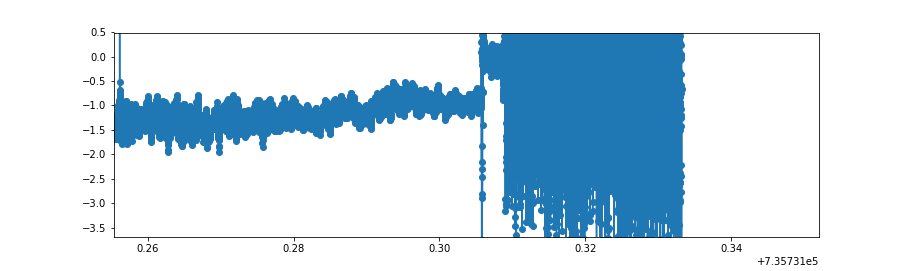

In [50]:
%time
%matplotlib qt
fig, ax = plt.subplots()

# Hook up the line
d.line, = ax.plot(dat_raw.mpltime, dat_raw.u, 'o-')
ax.set_autoscale_on(False)  # Otherwise, infinite loop
# Connect for changing the view limits
ax.callbacks.connect('xlim_changed', d.update)
fig.canvas.mpl_connect('pick_event', onpick)
    
plt.show()

In [53]:
t_range_start = .0485 + 7.357294e5
t_range_end = .30 + 7.357294e5
t_range = [t_range_start, t_range_end]
t_range

[735729.4485, 735729.7000000001]